## GWAS Enrichment
Author: Daniel Nachun and Jenny Empawi

#### Load libriaries

In [1]:
library(tidyverse)
library(ggplot2)
library(showtext)
font_add_google("Noto Sans", "Noto Sans")
showtext_auto()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: sysfonts

Loading required package: showtextdb



### EADB GWAS Watershed main plot

**Boxplot of GWAS effect size percentiles across different classes of outlier-associated functional rare variants in all genes and AD-relevant genes in the EADB GWAS.**

#### Load data

In [2]:
#eadb_main <- read_rds("/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_5h/eadb_main.rds") # path in BU cluster
eadb_main <- read_rds("/data/resource/staging_files/eadb_main.rds") # path in cloud


In [3]:
p1 <- ggplot(eadb_main, aes(study, percentile, fill = `Outlier type`)) +
    geom_boxplot() +
    theme_classic() +
    ylab("GWAS effect size percentile") +
    theme(text = element_text(family = "Noto Sans"),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size = 40, face = "bold"),
        axis.text.x = element_text(size = 36, color = "black"),
        axis.text.y = element_text(size = 36, color = "black"),
        strip.background = element_blank(),
        strip.text = element_text(face = "bold"),
        panel.background = element_rect(fill = NA),
        legend.text = element_text(size = 36), 
        legend.title = element_text(size = 40, face = "bold")
    )

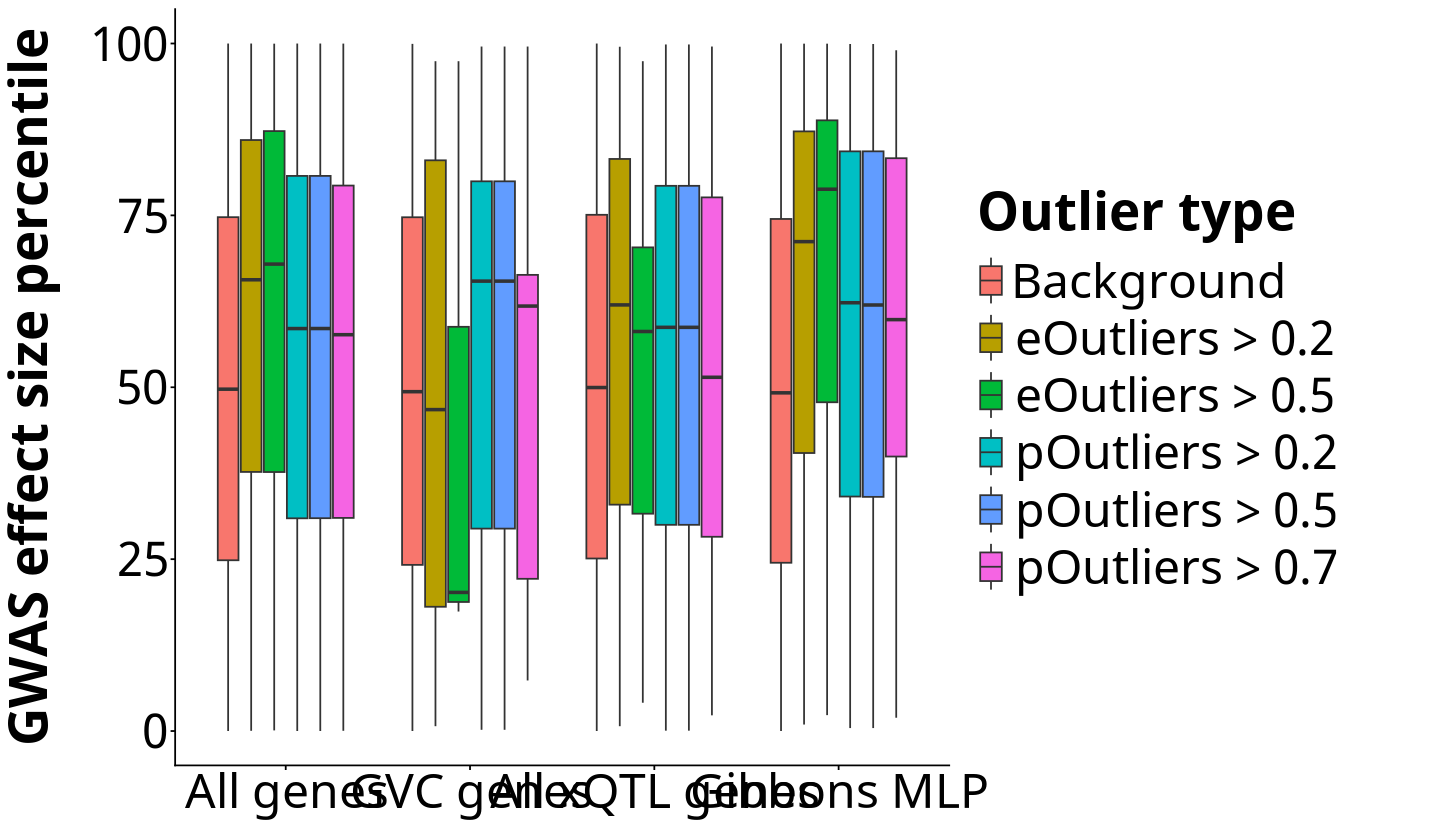

In [4]:
options(repr.plot.width = 12, repr.plot.height = 7)
p1
ggsave("Figure_5h_GWAS_enrichment_1.png", p1, width = 8, height = 4, dpi = 300)

### Watershed EADB supplementary plot

**Outlier-associated functional rare variants have modestly larger GWAS effect sizes in other AD risk burden test gene sets.** 
 Boxplot of GWAS effect size percentiles across different classes of outlier-associated functional rare variants in all genes and additional AD-relevant genes in the EADB GWAS.

#### Load data

In [5]:
#eadb_supplemental <- readRDS("/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_5h/eadb_supplemental.rds")  # path in BU cluster
eadb_supplemental <- readRDS("/data/resource/staging_files/eadb_supplemental.rds") # path in cloud

In [6]:
p2 <- ggplot(eadb_supplemental, aes(study, percentile, fill = `Outlier type`)) +
    geom_boxplot() +
    theme_classic() +
    ylab("GWAS effect size percentile") +
    theme(text = element_text(family = "Noto Sans"),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size = 40, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 36, color = "black"),
        axis.text.y = element_text(size = 36, color = "black"),
        strip.background = element_blank(),
        strip.text = element_text(face = "bold"),
        panel.background = element_rect(fill = NA),
        legend.text = element_text(size = 36), 
        legend.title = element_text(size = 40, face = "bold")
    )

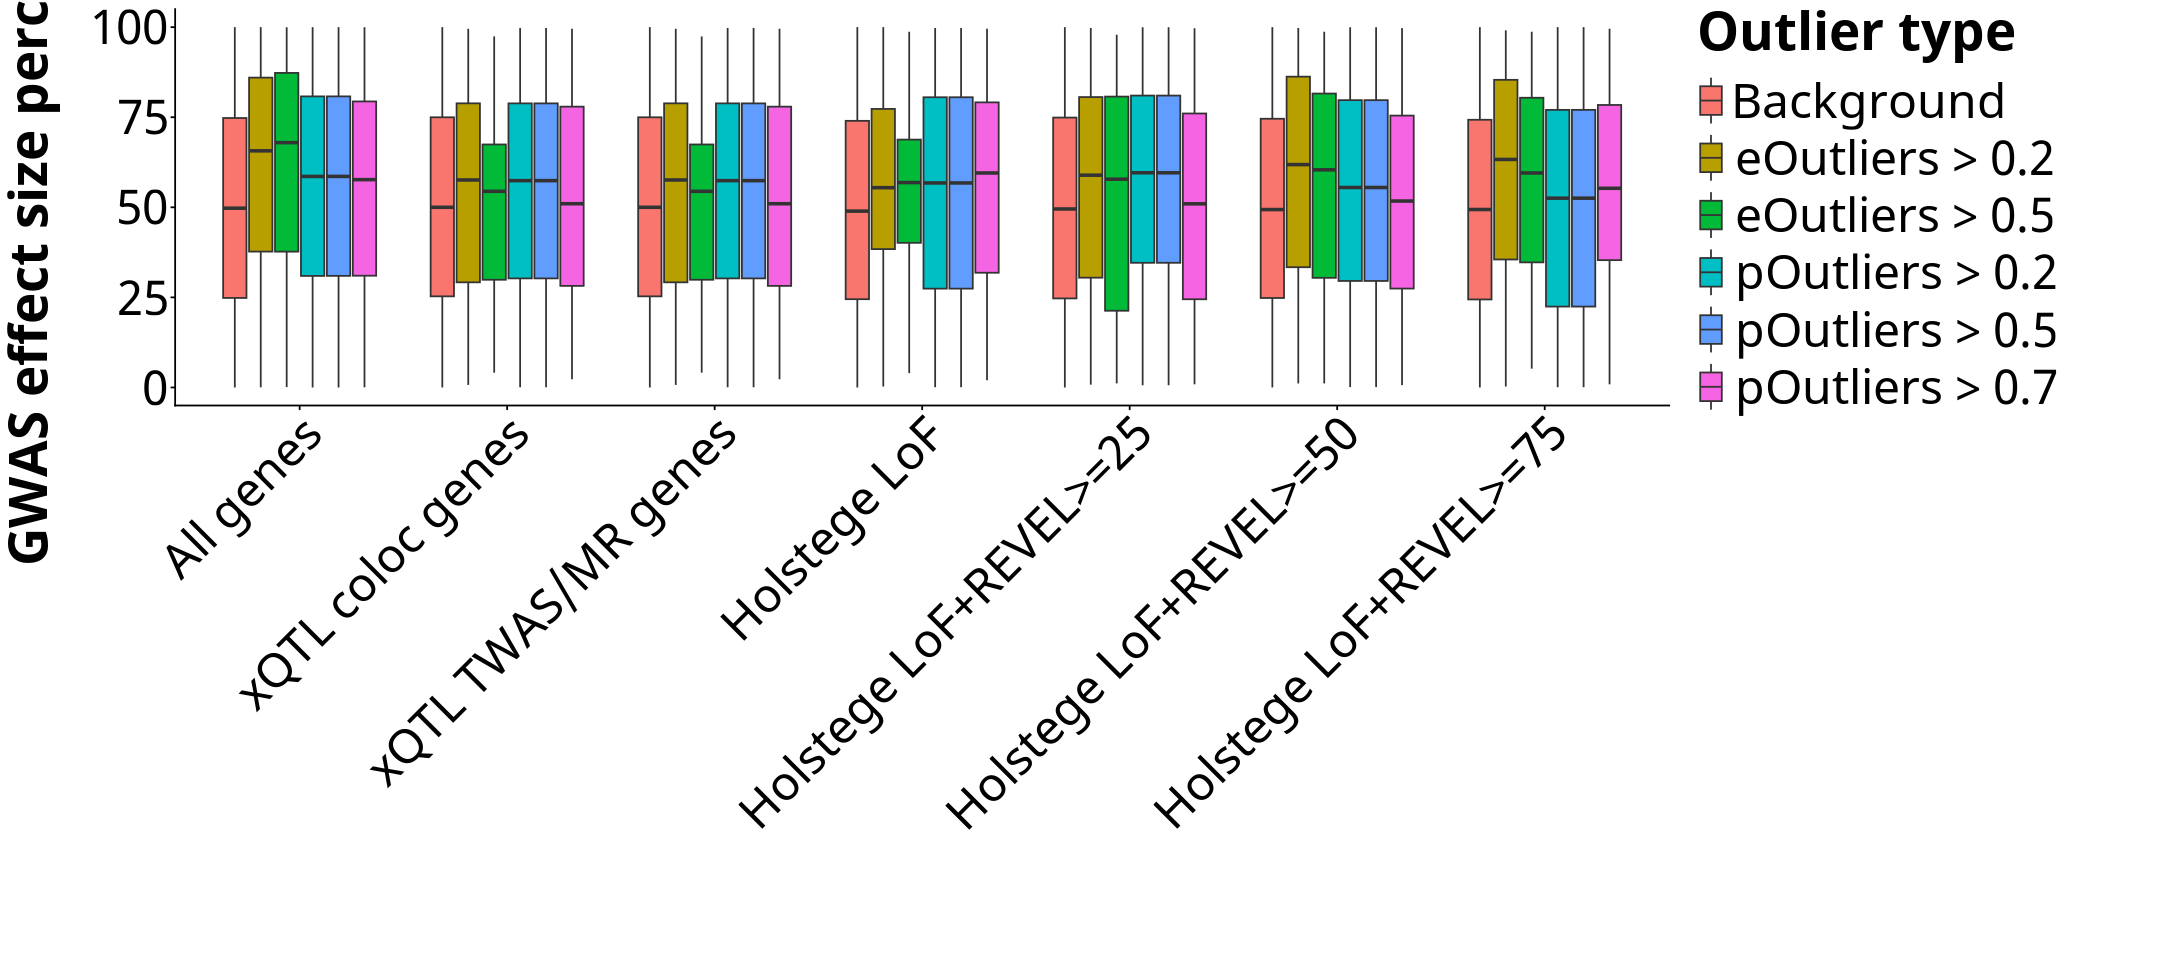

In [7]:
options(repr.plot.width = 18, repr.plot.height = 8)
p2
ggsave("Figure_5h_GWAS_enrichment_2.png", p2, width = 10, height = 6, dpi = 300)

### Calibration plot

**Outlier-associated rare variants have significantly larger GWAS effect sizes in the EADB GWAS in the top 100 to 1000 genes with the highest AD risk burden test scores.**  
Plot of -log<sub>10</sub> p-values for a linear model comparing outlier-associated functional rare variants to background variants.

#### Load data

In [8]:
#calibration_df <- readRDS("/restricted/projectnb/xqtl/jaempawi/xqtl/Figure_5h/calibration_df.rds") # path in BU cluster
calibration_df <- readRDS("/data/resource/staging_files/calibration_df.rds") # path in cloud

In [9]:
p3 <- ggplot(calibration_df, aes(set_size, logp, group = `Outlier type`, color = `Outlier type`)) +
    facet_wrap(~ study, scales = "free_x") +
    geom_point() +
    geom_line() +
    theme_classic() +
    xlab("Number of top genes") +
    ylab(expression(bold(-log[10]~"p-value"))) + 
    scale_x_continuous(breaks = seq(100, 1000, 100)) +
    theme(
        text = element_text(family = "Noto Sans"),
        panel.background = element_rect(fill = NA),
        strip.background = element_blank(),
        strip.text = element_text(size = 36, color = "black"),
        axis.text.x = element_text(size = 36, color = "black"),
        axis.text.y = element_text(size = 36, color = "black"),
        axis.title.x = element_text(size = 40, face = "bold"),
        axis.title.y = element_text(size = 40, face = "bold", color = "black"),
        legend.text = element_text(size = 36), 
        legend.title = element_text(size = 40, face = "bold"),
        legend.position = c(0.95, 0.05),
        legend.justification = c(1, 0)
    )

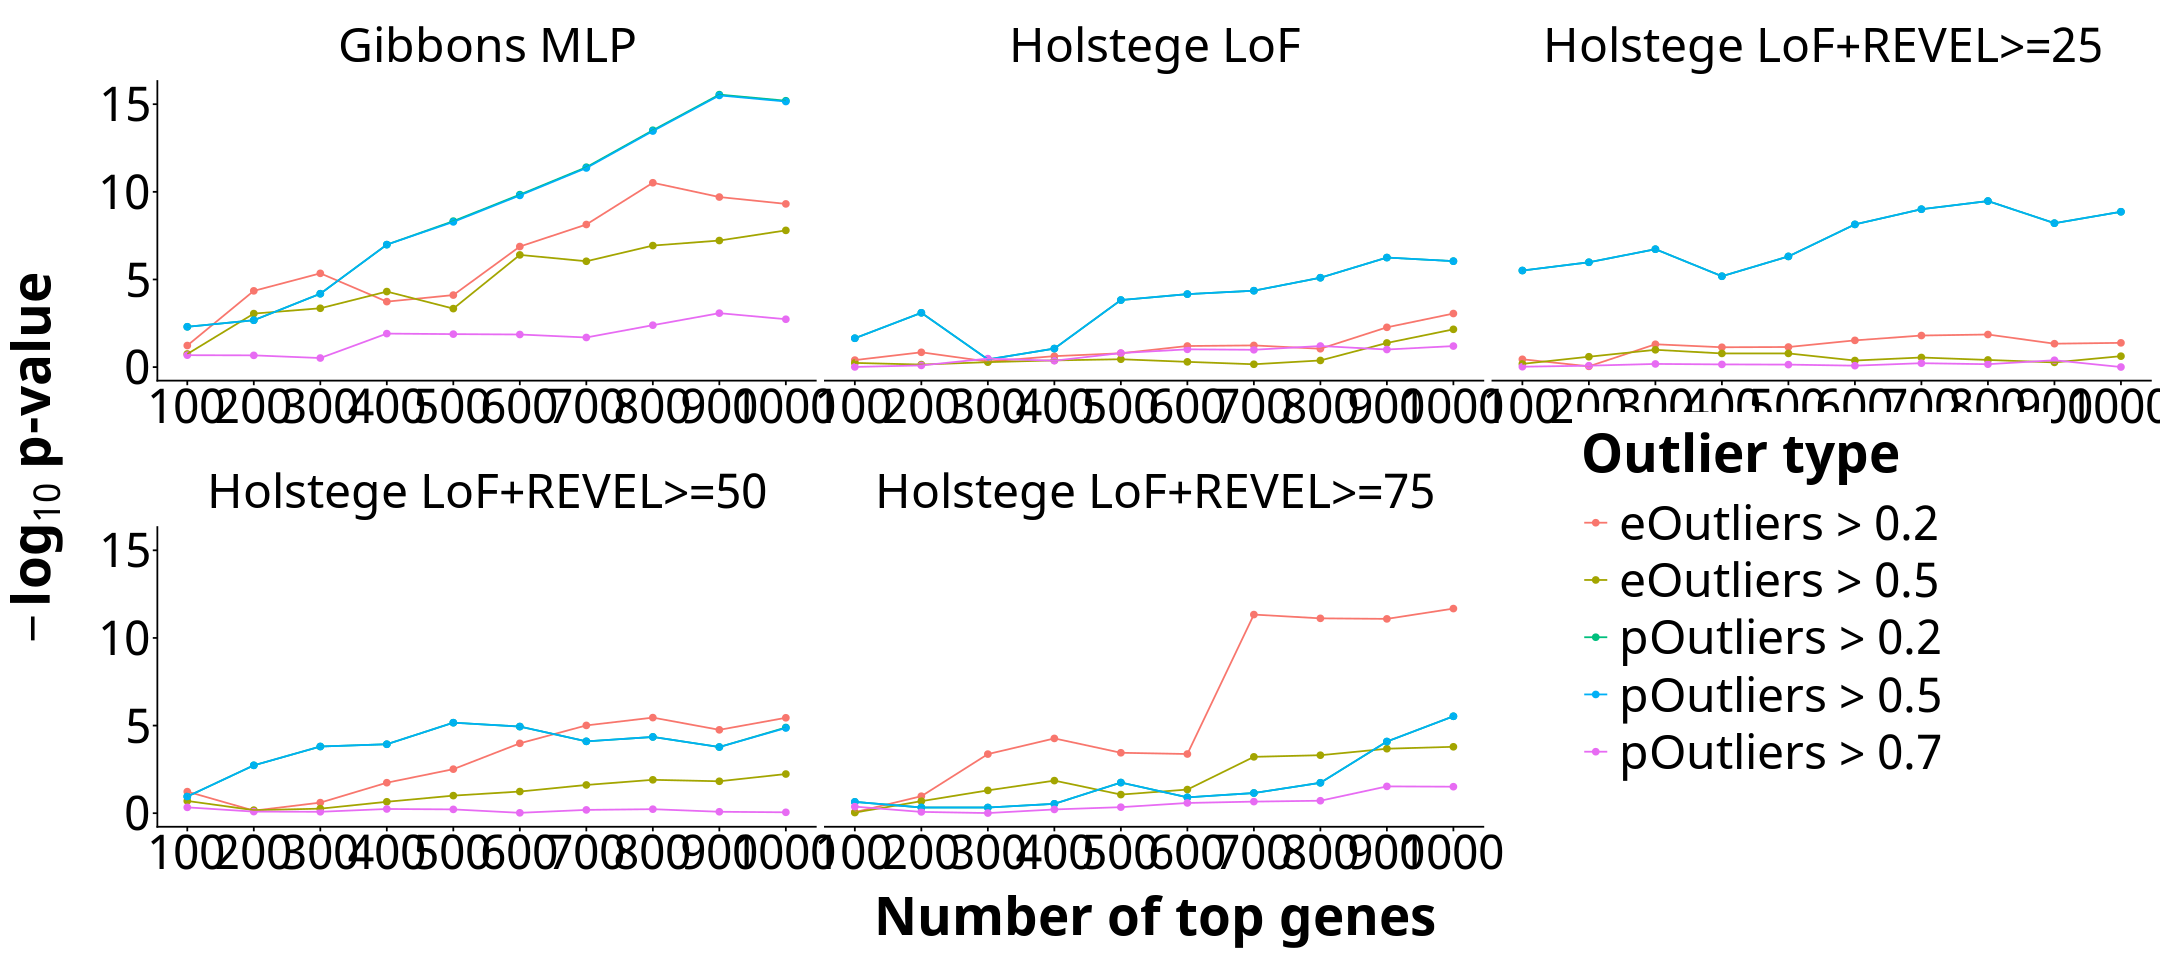

In [10]:
options(repr.plot.width = 18, repr.plot.height = 8)
p3
ggsave("Figure_5h_GWAS_enrichment_3.png", p3, width = 12, height = 6, dpi = 300)